# EBAC
# Projeto Analytics 2

-----

* A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

* Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

* Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [1]:
import pandas as pd

C:\ProgamaData\python\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgamaData\python\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import plotly.express as px

In [3]:
!pip install -U matplotlib

In [4]:
import matplotlib.pyplot as plt

In [5]:
data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(8)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1
5,Diego,60,Engenheiro,15000,2000,1,Solteiro,1
6,Denize,22,Estudante,1200,500,0,Solteiro,0
7,Claudio,24,Estudante,1500,250,1,Solteiro,0


In [6]:
df['Salário'] = pd.to_numeric(df['Salário'])
df['Limite_Credito'] = pd.to_numeric(df['Limite_Credito'])
df['Historico_Inadimplencia'] = pd.to_numeric(df['Historico_Inadimplencia'])
df['Imovel_Proprio'] = pd.to_numeric(df['Imovel_Proprio'])

In [7]:
df['Limite_Alto'] = df['Limite_Credito'] > 5000

In [8]:
df.groupby('Limite_Alto')['Salário'].mean()

Limite_Alto
False     6457.142857
True     12000.000000
Name: Salário, dtype: float64

In [9]:
df.groupby('Limite_Alto')['Idade'].mean()

Limite_Alto
False    33.714286
True     45.000000
Name: Idade, dtype: float64

In [10]:
df.groupby('Limite_Alto')['Historico_Inadimplencia'].mean()

Limite_Alto
False    0.428571
True     0.000000
Name: Historico_Inadimplencia, dtype: float64

In [11]:
df.groupby('Limite_Alto')['Imovel_Proprio'].mean()

Limite_Alto
False    0.285714
True     1.000000
Name: Imovel_Proprio, dtype: float64

------

Com base nos dados fornecidos, foi constrido 3 gráficos que apresentão 3 grandes impulsionadores para o limite alto de crédito:
* Salário por Profissão (capacidade de pagamento)

* Média do Limite Alto por Profissão (estabilidade socioeconômica)

* Historico de Inadimplência e Limite Alto (baixo risco para o credor)

----------

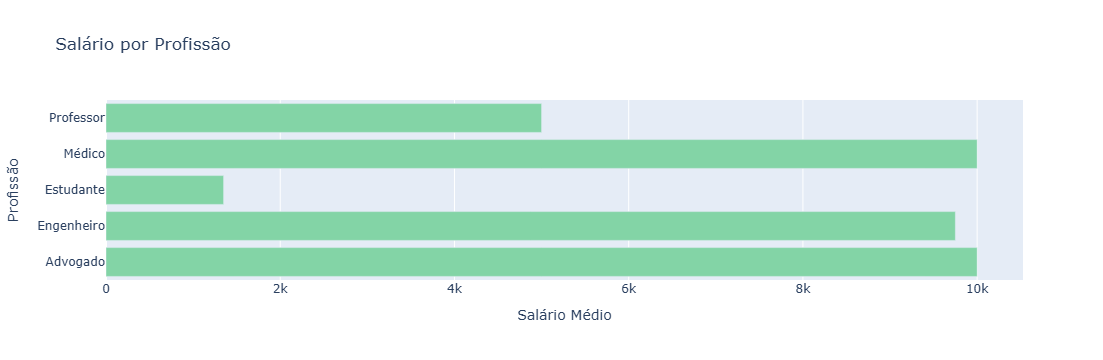

In [12]:
# Agrupando os dados do DataFrame por profissão e calculando a média do salário para cada profissão
salario_por_profissao = df.groupby('Profissão')['Salário'].mean().reset_index()

# Criando o gráfico de barras horizontais, muito semelhante a biblioteca matplot
fig = px.bar(salario_por_profissao, x = 'Salário', y = 'Profissão', orientation = 'h', color_discrete_sequence=['#83d4a6'],
            title = 'Salário por Profissão',
            labels = {'Salário': 'Salário Médio', 'Profissão': 'Profissão'})

# Exibindo o gráfico
fig.show()


* O salário é um indicador direto da capacidade de pagamento. 

* Há uma correlação direta entre renda mensal e acesso a crédito.


-----------------

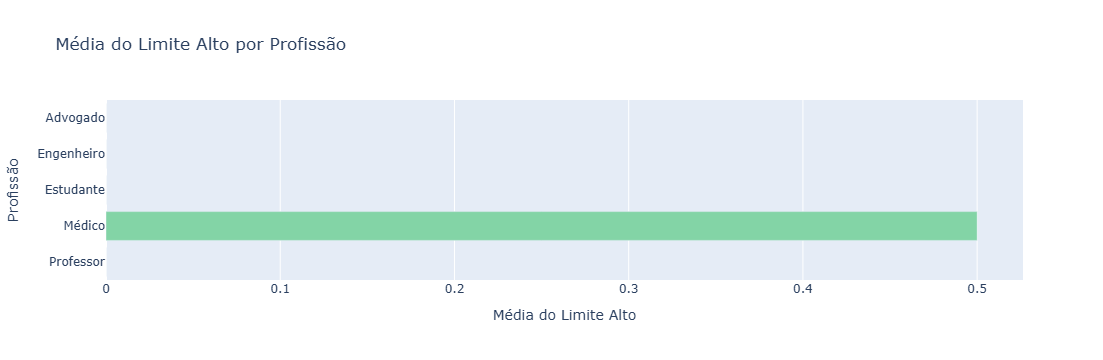

In [13]:
# Agrupando os dados do DataFrame por profissão e limite alto
Limite_Alto_por_profissao = df.groupby('Profissão')['Limite_Alto'].mean().reset_index()

# Criando o gráfico de barras horizontais, muito semelhante a biblioteca matplot
fig = px.bar(Limite_Alto_por_profissao, x = 'Limite_Alto', y = 'Profissão', orientation = 'h', color_discrete_sequence=['#83d4a6'],
            title = 'Média do Limite Alto por Profissão',
            labels = {'Limite_Alto': 'Média do Limite Alto', 'Profissão': 'Profissão'})

fig.update_layout(yaxis=dict(autorange="reversed"))  # para que a profissão de maior limite fique no topo

# Exibindo o gráfico
fig.show()

* A profissão representa o nível de estabilidade e perfil socioeconômico.
* Quanto maior o salário da profissão mais alto o limite de credito.

-------------

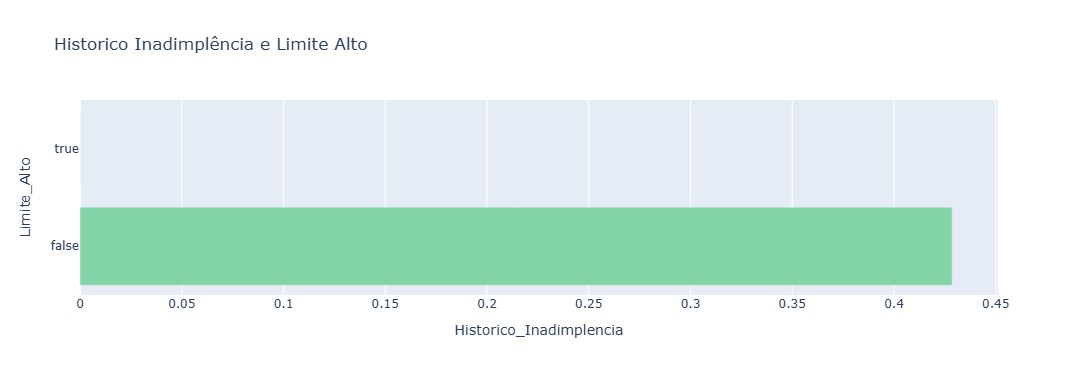

In [14]:
# Agrupando os dados do DataFrame por Historico Inadimplenciao e Limite Alto
Historico_Inadimplencia_por_Limite_Alto = df.groupby('Limite_Alto')['Historico_Inadimplencia'].mean().reset_index()

# Criando o gráfico de barras horizontais, muito semelhante a biblioteca matplot
fig = px.bar(Historico_Inadimplencia_por_Limite_Alto, x = 'Historico_Inadimplencia', y = 'Limite_Alto', orientation = 'h', color_discrete_sequence=['#83d4a6'],
            title = 'Historico Inadimplência e Limite Alto',
            labels = {'Inadimplência': 'Historico Inadimplência', 'Limite': 'Limite Alto'})

# Exibindo o gráfico
fig.show()

* Pessoas com limite alto têm um histórico de inadimplência praticamente nulo.

* Taxa de Inadimplência ≈0%  = Clientes com limite alto de crédito.
* Taxa de Inadimplência  ↑%  = Clientes com limite baixo de crédito.

----------

Essa análise reforça a importância de manter:
* bons hábitos financeiros
* planejamento de carreira

Para ter mais acesso a recursos de crédito e melhores condições financeiras.

--------------------